### Implement the project

**Classifier Model:** We will use the VGGNet CNN model for this task as it has proven effective in various image classification problems and is suitable for our case of food ingredient identification.

**Image Processing:** Since no proficiency is expected, we will rely on simple logics. We will divide the camera view into 10 equal parts and assume that ingredients are placed on the centers of these divisions. We will extract image patches centered on these division points.

**Data:** For our initial model, we will need to create a dataset from images captured with our camera or we can use existing datasets found on the internet. We would need labeled images of each ingredient, preferably centered in the image for simplicity.

**Implementation:** We will use Python and its powerful libraries for machine learning, such as TensorFlow, Keras, and OpenCV.

**Labeling:** Once our model is trained and able to make predictions, we will create a script that takes a new image, divides it into sections, extracts the central points, makes a prediction for each point and finally draws a box with the corresponding label.

### Project outline with steps to follow

**Data Collection:** Collect images of each ingredient. Each image should ideally contain a single ingredient centered in the image.

**Data Preprocessing:** Preprocess the images. This includes resizing images, normalizing pixel values, dividing images into equal parts, and extracting the central points as per the project requirements.

**Model Training:** Implement the VGGNet model using TensorFlow and Keras. Train the model using the preprocessed images and corresponding labels.

**Model Evaluation:** Split your dataset into training, validation, and test datasets. Evaluate your model on the test dataset to understand its performance.

**Model Prediction & Visualization:** Write a function to predict labels on new images. This function should also draw boxes and write the predicted labels on the boxes.

### Import the required libraries

In [8]:
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Ignore warning messages

In [9]:
warnings.filterwarnings('ignore')

### Define constants

In [10]:
# Define constants
IMG_SIZE = 224  # VGG16 input size
BATCH_SIZE = 32
N_CLASSES = 10  # Number of classes/ingredients in your dataset
N_EPOCHS = 10
DATA_DIR = "allData"  # Base directory containing ingredient directories

### Define the VGGNet model

In [11]:
# Define the VGGNet model
model = Sequential([
    # Simplified version of VGGNet
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(N_CLASSES, activation='softmax')  
])

### Compile the model

***Model Definition and Compilation:** The model architecture is defined using the Sequential API, consisting of convolutional, max-pooling, flatten, and dense layers. The model is compiled with the Adam optimizer and categorical cross-entropy loss.

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Prepare the data

**Data Preparation:** The ImageDataGenerator is used to load and preprocess the image data from the specified directory. Separate generators are created for training and validation data using the flow_from_directory method.

In [13]:
# Prepare the data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 169 images belonging to 10 classes.
Found 40 images belonging to 10 classes.


### Train the model

**Model Training:** The model is trained using the fit method with the training data generator. The number of epochs and the validation data generator are specified.

In [14]:
# Train the model
history = model.fit(train_gen, epochs=N_EPOCHS, validation_data=val_gen)

Epoch 1/10
6/6 [==============================] - 19s 3s/step - loss: 25.5175 - accuracy: 0.1243 - val_loss: 3.3442 - val_accuracy: 0.0750
Epoch 2/10
6/6 [==============================] - 16s 3s/step - loss: 2.2466 - accuracy: 0.1834 - val_loss: 1.9562 - val_accuracy: 0.3250
Epoch 3/10
6/6 [==============================] - 15s 3s/step - loss: 1.3718 - accuracy: 0.5207 - val_loss: 1.3281 - val_accuracy: 0.4750
Epoch 4/10
6/6 [==============================] - 16s 3s/step - loss: 0.8888 - accuracy: 0.7160 - val_loss: 2.3900 - val_accuracy: 0.2750
Epoch 5/10
6/6 [==============================] - 16s 3s/step - loss: 0.9868 - accuracy: 0.7574 - val_loss: 1.5330 - val_accuracy: 0.4500
Epoch 6/10
6/6 [==============================] - 16s 3s/step - loss: 0.6511 - accuracy: 0.7692 - val_loss: 1.3587 - val_accuracy: 0.5000
Epoch 7/10
6/6 [==============================] - 16s 3s/step - loss: 0.3590 - accuracy: 0.8994 - val_loss: 1.3656 - val_accuracy: 0.5250
Epoch 8/10
6/6 [=================

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 802816)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               102760576 
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

### Plotting Training Loss and Training Accuracy

**Plotting Training Loss and Accuracy:** The training and validation loss and accuracy are plotted using Matplotlib. Two subplots are created for loss and accuracy.

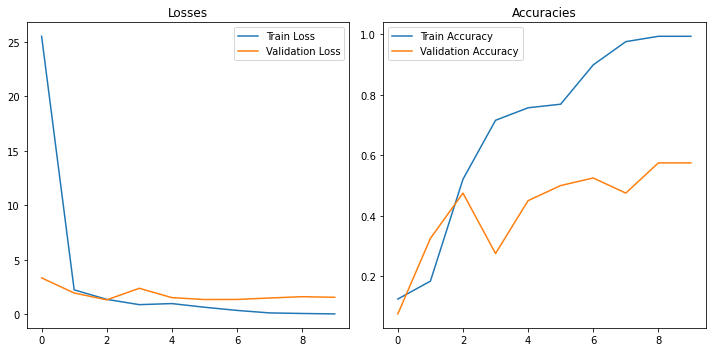

In [15]:
# Plotting Training Loss
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Losses')
plt.legend()

# Plotting Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracies')
plt.legend()

plt.tight_layout()
plt.show() 

# Save the model
model.save('ingredient_classifier.h5')

### Guessing what a material is by giving a picture of it

**Prediction and Visualization:** The predict_and_visualize function takes an image path, loads and preprocesses the image, performs prediction using the trained model, and visualizes the prediction by drawing a rectangle around the image and displaying the predicted ingredient name.

In [16]:
ingredient_names = ['Avocado', 'Cucumber', 'Patty', 'Lettuce', 'Mushrooms', 'Onion Rings', 'Pepper', 'Pickle', 'Cheddar', 'Tomato']

In [17]:
def predict_and_visualize(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = img.reshape((1, IMG_SIZE, IMG_SIZE, 3))
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)
    predicted_class_name = ingredient_names[predicted_class[0]]

    # Visualization
    img = cv2.imread(img_path)
    height, width, _ = img.shape
    cv2.rectangle(img, (0, 0), (width, height), (0, 255, 0), 2)
    cv2.putText(img, predicted_class_name, (width//2, height//2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.imshow("Prediction", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
predict_and_visualize("allData/avocado/0.png")

1/1 [==============================] - 0s 165ms/step


### Guessing each ingredient separately by giving all the hamburger ingredients

**Multiple-Image Grid Prediction and Visualization:** The predict_and_visualize_multiple function loads the trained model, loads the input image, determines the grid size based on the image dimensions, iterates over the grid, extracts each tile from the image, preprocesses the tile, performs prediction using the model, and visualizes the predictions by drawing rectangles and displaying the predicted ingredient names within each tile.

In [18]:
def predict_and_visualize_multiple(img_path, model_path):
    # Load the pre-trained model
    model = load_model(model_path)
    
    # Load the image
    img = cv2.imread(img_path)
    
    # Determine the size of the grid
    grid_size = (2, 5) if len(img) < len(img[0]) else (5, 2)
    tile_size = (img.shape[0] // grid_size[0], img.shape[1] // grid_size[1])

    # Iterate over the grid
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            # Extract the tile
            tile = img[i * tile_size[0] : (i+1) * tile_size[0], j * tile_size[1] : (j+1) * tile_size[1]]

            # Preprocess the tile
            tile_resized = cv2.resize(tile, (IMG_SIZE, IMG_SIZE))
            tile_resized = tile_resized / 255.0
            tile_resized = tile_resized.reshape((1, IMG_SIZE, IMG_SIZE, 3))
            
            # Make prediction
            prediction = model.predict(tile_resized)
            predicted_class = np.argmax(prediction, axis=1)
            predicted_class_name = ingredient_names[predicted_class[0]]
            
            # Visualization
            cv2.rectangle(img, (j * tile_size[1], i * tile_size[0]), ((j+1) * tile_size[1], (i+1) * tile_size[0]), (0, 255, 0), 2)
            cv2.putText(img, str(predicted_class_name), (j * tile_size[1] + tile_size[1]//2, i * tile_size[0] + tile_size[0]//2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    
    cv2.imshow("Prediction", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Test the function with an image
predict_and_visualize_multiple("test.png", "ingredient_classifier.h5")

1/1 [==============================] - 0s 100ms/step
